In [1]:
!pwd

/panda/eedy/chile/s1_d156/notebook


In [2]:
from mintpy.objects import ramp
from mintpy.utils import ptime, readfile, writefile
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, writefile
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [3]:
######### split

In [4]:
path_split = '../mintpy_split_ion_upsample/geo/geo_ion-split.h5'

In [5]:
!reference_point.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 -y 180 -x 190
!reference_date.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 --ref-date 20190306

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed
--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
input reference date: 20190306
--------------------------------------------------
change reference date for file: /panda/eedy/chile/s1_d156/mintpy_split_ion_upsample/geo/geo_ion-split.h5
input refDate is the same as the existing REF_DATE.
Nothing to be done.
time used: 00 mins 1.0 secs.


In [6]:
timeseries_split = readfile.read(path_split, datasetName='timeseries')[0]
timeseries_split = np.squeeze(timeseries_split)

mask_path_split = '../mintpy_split_ion_upsample/geo/geo_maskTempCoh.h5'
mask_split = readfile.read(mask_path_split, datasetName='mask')[0]
mask_split = np.squeeze(mask_split)

data_out, ramp = ramp.deramp(timeseries_split, mask_in=mask_split, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [7]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_split = np.zeros(timeseries_split.shape[0])
slope_ion_split_dongxifangxiang = np.zeros(timeseries_split.shape[0])
slope_ion_split_nanbeifangxiang = np.zeros(timeseries_split.shape[0])
angle_deg_ion_split = np.zeros(timeseries_split.shape[0])
meta = readfile.read_attribute(path_split)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_split.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( cm(ion)/ 100km(juli)):', magnitude*1e7)
    print('The direction of the gradient is:', direction)

    slope_ion_split[i] = magnitude*1e7
    angle_deg_ion_split[i] = direction
    slope_ion_split_dongxifangxiang[i] = dy*1e7
    slope_ion_split_nanbeifangxiang[i] = dx*1e7

    print(i)


The equation of the fit plane is: Z = 9.992953550689577e-06 * X + -2.441384332909256e-06 * Y + -0.0023184323162842965
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.07294812924770623
The direction of the gradient is: 208.61226024042583
0
The equation of the fit plane is: Z = -4.764671292251504e-05 * X + -5.753113637626966e-05 * Y + 0.01783583571768665
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.8780086844085789
The direction of the gradient is: 290.3508674055463
1
The equation of the fit plane is: Z = -3.1137653620421965e-07 * X + -4.2849024982903817e-05 * Y + 0.006172307416139835
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.6131231222612149
The direction of the gradient is: 270.18647357286056
2
The equation of the fit plane is: Z = -3.0683648775008885e-05 * X + -5.9929657977309026e-05 * Y + 0.015531038986830004
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.8797800599366361
The direction of the gradient is: 282.91502318059315
3
The 

In [8]:
######### GIM

In [9]:
path_GIM = '../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5'

In [10]:
!reference_point.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 -y 180 -x 190
!reference_date.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 --ref-date 20190306

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed
--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
input reference date: 20190306
--------------------------------------------------
change reference date for file: /panda/eedy/chile/s1_d156/mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
input refDate is the same as the existing REF_DATE.
Nothing to be done.
time used: 00 mins 1.0 secs.


In [11]:
timeseries_GIM = readfile.read(path_GIM, datasetName='timeseries')[0]
timeseries_GIM = np.squeeze(timeseries_GIM)

mask_path_gim = '../mintpy_gim_ion_upsample/geo/geo_maskTempCoh.h5'
mask_gim = readfile.read(mask_path_gim, datasetName='mask')[0]
mask_gim = np.squeeze(mask_gim)

from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_GIM, mask_in=mask_gim, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [12]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_GIM = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_dongxifangxiang = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_nanbeifangxiang = np.zeros(timeseries_GIM.shape[0])
angle_deg_ion_GIM = np.zeros(timeseries_GIM.shape[0])
meta = readfile.read_attribute(path_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( cm(ion)/ 100km(juli)):', magnitude*1e7)
    print('The direction of the gradient is:', direction)

    slope_ion_GIM[i] = magnitude*1e7
    angle_deg_ion_GIM[i] = direction
    slope_ion_GIM_dongxifangxiang[i] = dy*1e7
    slope_ion_GIM_nanbeifangxiang[i] = dx*1e7

    print(i)


The equation of the fit plane is: Z = -3.8033162548413775e-05 * X + -1.4243608843963194e-05 * Y + 0.009954425661875916
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.3177186529230066
The direction of the gradient is: 320.0978801606302
0
The equation of the fit plane is: Z = -3.392756596515531e-05 * X + 1.7006202761571896e-05 * Y + 0.003787623347865803
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.32632390260383404
The direction of the gradient is: 48.219077874013635
1
The equation of the fit plane is: Z = -2.707436211130215e-05 * X + -1.9707544614552125e-05 * Y + 0.008685172807070322
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.3310948637133755
The direction of the gradient is: 301.60340001112274
2
The equation of the fit plane is: Z = -2.0879662687147607e-05 * X + -7.98137625691232e-06 * Y + 0.0053620121837995435
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.17591745475290946
The direction of the gradient is: 319.5192740969193
3
The 

In [13]:
with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_correct[i] = slope_ion_GIM[j[0]]
slope_ion_GIM = slope_ion_GIM_correct

angle_deg_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_GIM_correct[i] = angle_deg_ion_GIM[j[0]]
angle_deg_ion_GIM = angle_deg_ion_GIM_correct

slope_ion_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_dongxifangxiang_correct[i] = slope_ion_GIM_dongxifangxiang[j[0]]
slope_ion_GIM_dongxifangxiang = slope_ion_GIM_dongxifangxiang_correct

slope_ion_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_nanbeifangxiang_correct[i] = slope_ion_GIM_nanbeifangxiang[j[0]]
slope_ion_GIM_nanbeifangxiang = slope_ion_GIM_nanbeifangxiang_correct

In [14]:
######### hight_GIM

In [15]:
path_hight_GIM = '../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5'

In [16]:
!reference_point.py ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 -y 180 -x 190
!reference_date.py ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 --ref-date 20190306

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed
--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
input reference date: 20190306
--------------------------------------------------
change reference date for file: /panda/eedy/chile/s1_d156/mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5
input refDate is the same as the existing REF_DATE.
Nothing to be done.
time used: 00 mins 1.0 secs.


In [17]:
timeseries_hight_GIM = readfile.read(path_hight_GIM, datasetName='timeseries')[0]
timeseries_hight_GIM = np.squeeze(timeseries_hight_GIM)

mask_path_hight_gim = '../mintpy_hight_gim_ion_upsample/geo/geo_maskTempCoh.h5'
mask_hight_gim = readfile.read(mask_path_hight_gim, datasetName='mask')[0]
mask_hight_gim = np.squeeze(mask_hight_gim)

from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_hight_GIM, mask_in=mask_hight_gim, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [18]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_hight_GIM = np.zeros(timeseries_hight_GIM.shape[0])
slope_ion_hight_GIM_dongxifangxiang = np.zeros(timeseries_hight_GIM.shape[0])
slope_ion_hight_GIM_nanbeifangxiang = np.zeros(timeseries_hight_GIM.shape[0])
angle_deg_ion_hight_GIM = np.zeros(timeseries_hight_GIM.shape[0])
meta = readfile.read_attribute(path_hight_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_hight_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( cm(ion)/ 100km(juli)):', magnitude*1e7)
    print('The direction of the gradient is:', direction)

    slope_ion_hight_GIM[i] = magnitude*1e7
    angle_deg_ion_hight_GIM[i] = direction
    slope_ion_hight_GIM_dongxifangxiang[i] = dy*1e7
    slope_ion_hight_GIM_nanbeifangxiang[i] = dx*1e7
    

    print(i)


The equation of the fit plane is: Z = -4.911591858337928e-05 * X + -1.711667510337664e-05 * Y + 0.012304679575402848
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.3988218186429971
The direction of the gradient is: 322.1128456301659
0
The equation of the fit plane is: Z = -3.650657477910052e-05 * X + 1.1597930035087537e-05 * Y + 0.004664650384868362
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.28683431111717916
The direction of the gradient is: 35.34983248088548
1
The equation of the fit plane is: Z = -4.70608394460939e-05 * X + -1.4148910974139492e-05 * Y + 0.01156077330836998
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.3632405588024452
The direction of the gradient is: 326.1268162498674
2
The equation of the fit plane is: Z = -2.6852055897750607e-05 * X + 2.1829044676486677e-06 * Y + 0.004605674037487224
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.17489290938037202
The direction of the gradient is: 10.287877703988386
3
The equat

In [19]:
with h5py.File(path_hight_GIM, 'r') as file:
    date_hight_GIM = file['date']
    date_hight_GIM = date_hight_GIM[()]
date_hight_GIM = np.char.decode(date_hight_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_hight_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_correct[i] = slope_ion_hight_GIM[j[0]]
slope_ion_hight_GIM = slope_ion_hight_GIM_correct

angle_deg_ion_hight_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_hight_GIM_correct[i] = angle_deg_ion_hight_GIM[j[0]]
angle_deg_ion_hight_GIM = angle_deg_ion_hight_GIM_correct

slope_ion_hight_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_dongxifangxiang_correct[i] = slope_ion_hight_GIM_dongxifangxiang[j[0]]
slope_ion_hight_GIM_dongxifangxiang = slope_ion_hight_GIM_dongxifangxiang_correct

slope_ion_hight_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_nanbeifangxiang_correct[i] = slope_ion_hight_GIM_nanbeifangxiang[j[0]]
slope_ion_hight_GIM_nanbeifangxiang = slope_ion_hight_GIM_nanbeifangxiang_correct

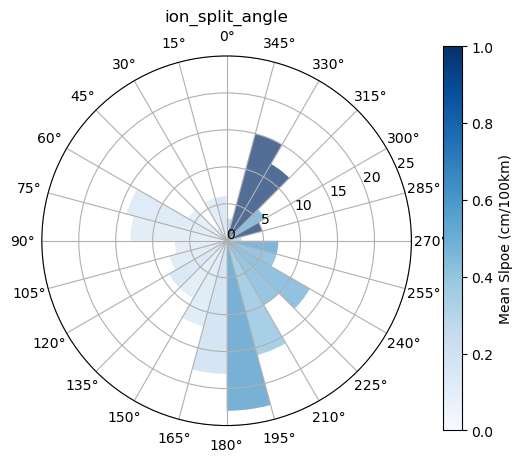

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_split 和 slope_ion_split 是已经定义好的 numpy 数组
# 转换为弧度
ion_split_angle_deg_rad = np.deg2rad(angle_deg_ion_split)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_split_angle_deg_rad, slope_ion_split, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
#colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))
colors = plt.get_cmap('Blues')(bin_means)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_split_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
#ax.set_yticklabels([])  # 删除y轴标签
#ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_split_angle')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # 定义颜色条的位置和大小
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Mean Slpoe (cm/100km)')

# 在径向上添加长度刻度
#ax.set_yticks(np.linspace(0, max(n), 5))  # 设置刻度范围和数量
ax.set_yticks(np.linspace(0, 25, 6))

plt.show()

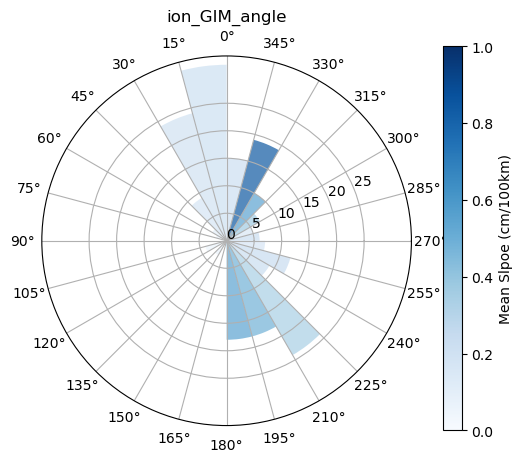

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_GIM 和 slope_ion_GIM 是已经定义好的 numpy 数组
# 转换为弧度
ion_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_GIM)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_GIM_angle_deg_rad, slope_ion_GIM, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
#colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))
colors = plt.get_cmap('Blues')(bin_means)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_GIM_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
#ax.set_yticklabels([])  # 删除y轴标签
#ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_GIM_angle')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # 定义颜色条的位置和大小
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Mean Slpoe (cm/100km)')

# 在径向上添加长度刻度
#ax.set_yticks(np.linspace(0, max(n), 5))  # 设置刻度范围和数量
ax.set_yticks(np.linspace(0, 25, 6))

plt.show()

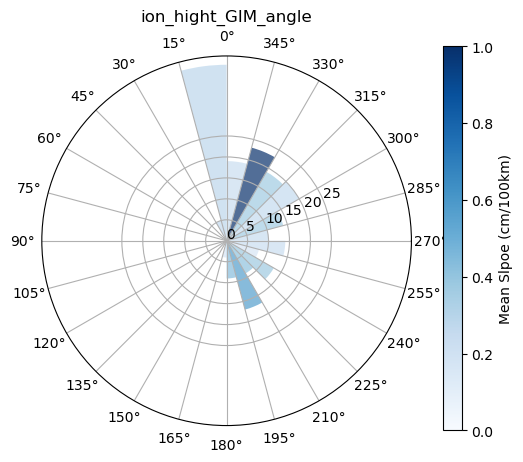

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_GIM 和 slope_ion_GIM 是已经定义好的 numpy 数组
# 转换为弧度
ion_hight_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_hight_GIM)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_hight_GIM_angle_deg_rad, slope_ion_hight_GIM, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
#colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))
colors = plt.get_cmap('Blues')(bin_means)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_hight_GIM_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
#ax.set_yticklabels([])  # 删除y轴标签
#ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_hight_GIM_angle')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # 定义颜色条的位置和大小
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Mean Slpoe (cm/100km)')

# 在径向上添加长度刻度
#ax.set_yticks(np.linspace(0, max(n), 5))  # 设置刻度范围和数量
ax.set_yticks(np.linspace(0, 25, 6))

plt.show()

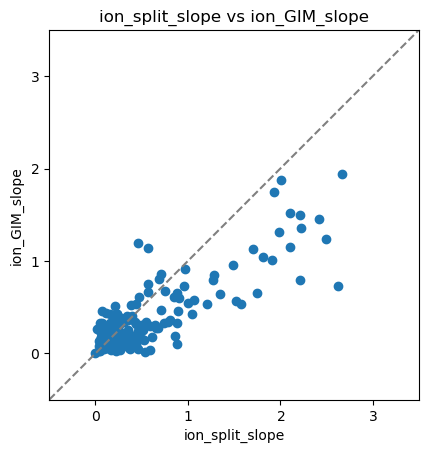

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split, slope_ion_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope')
plt.ylabel('ion_GIM_slope')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5,3.5]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

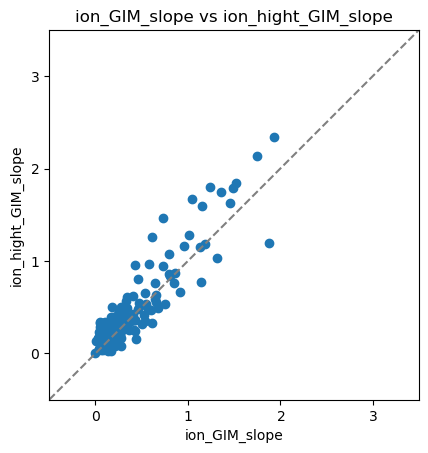

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_GIM, slope_ion_hight_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_GIM_slope')
plt.ylabel('ion_hight_GIM_slope')

# 添加标题
plt.title('ion_GIM_slope vs ion_hight_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5,3.5]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

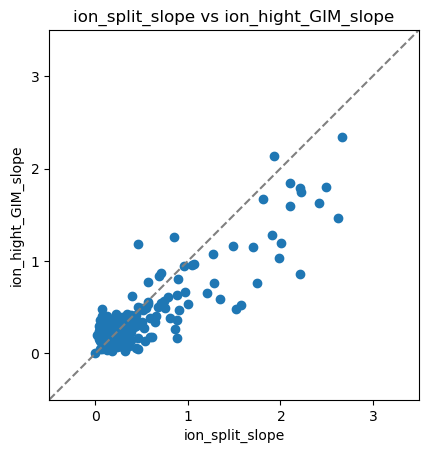

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split, slope_ion_hight_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope')
plt.ylabel('ion_hight_GIM_slope')

# 添加标题
plt.title('ion_split_slope vs ion_hight_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5,3.5]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

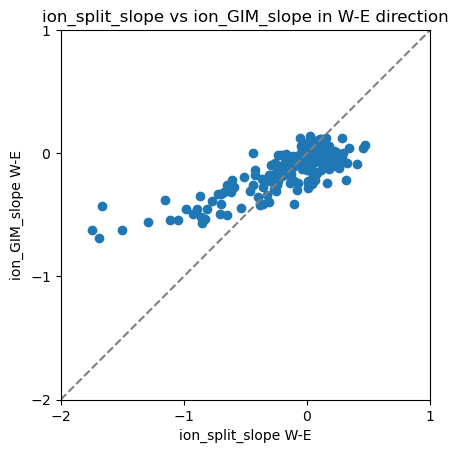

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_dongxifangxiang, slope_ion_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope W-E')
plt.ylabel('ion_GIM_slope W-E')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 1]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

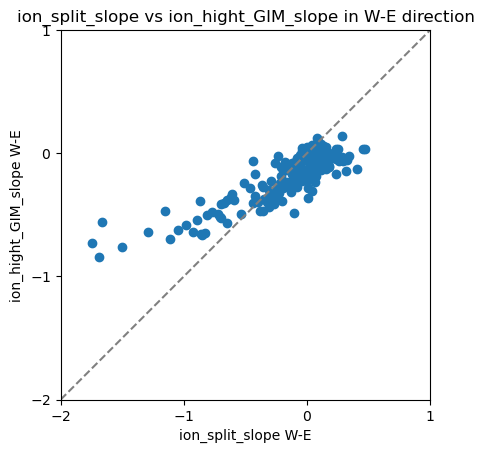

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_dongxifangxiang, slope_ion_hight_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope W-E')
plt.ylabel('ion_hight_GIM_slope W-E')

# 添加标题
plt.title('ion_split_slope vs ion_hight_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 1]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

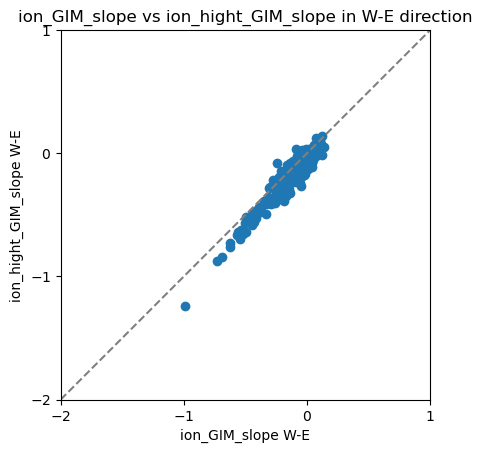

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_GIM_dongxifangxiang, slope_ion_hight_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_GIM_slope W-E')
plt.ylabel('ion_hight_GIM_slope W-E')

# 添加标题
plt.title('ion_GIM_slope vs ion_hight_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 1]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

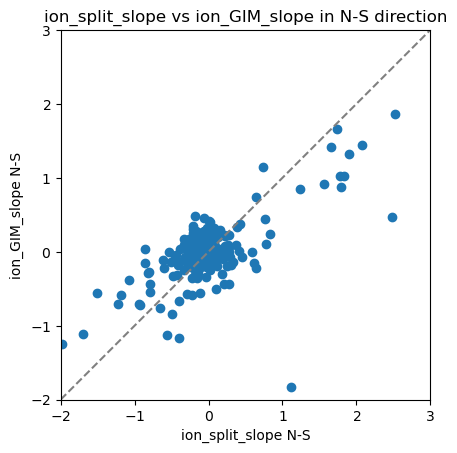

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_nanbeifangxiang, slope_ion_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope N-S')
plt.ylabel('ion_GIM_slope N-S')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 3]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

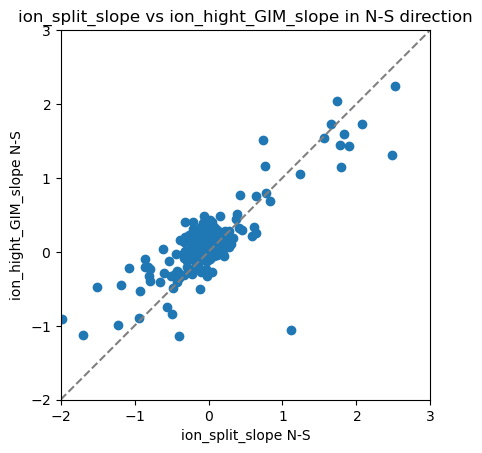

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_nanbeifangxiang, slope_ion_hight_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope N-S')
plt.ylabel('ion_hight_GIM_slope N-S')

# 添加标题
plt.title('ion_split_slope vs ion_hight_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 3]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

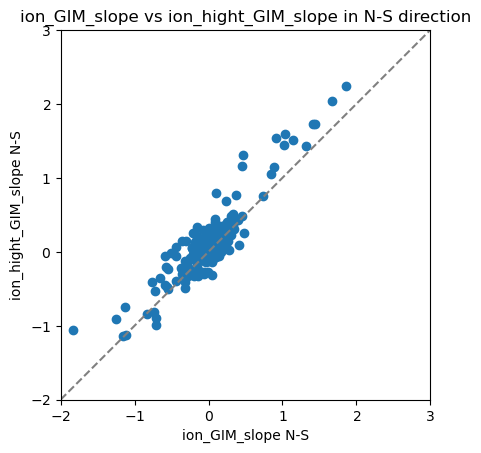

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_GIM_nanbeifangxiang, slope_ion_hight_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_GIM_slope N-S')
plt.ylabel('ion_hight_GIM_slope N-S')

# 添加标题
plt.title('ion_GIM_slope vs ion_hight_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 3]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

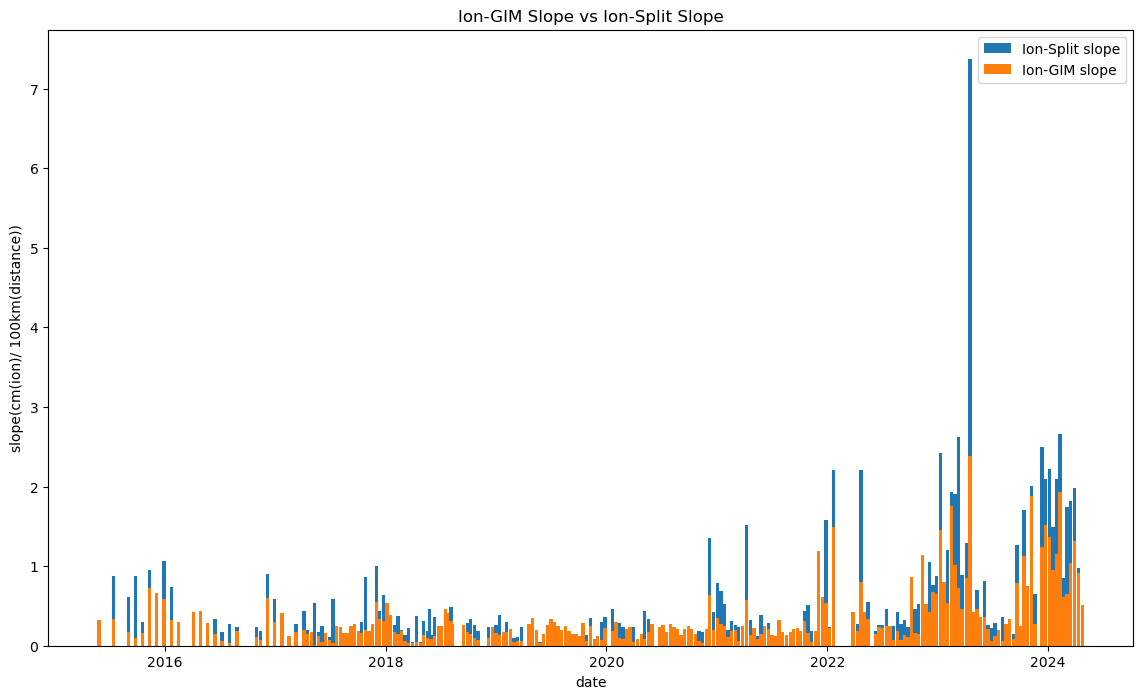

In [32]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split, width, label='Ion-Split slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM, width, label='Ion-GIM slope', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(cm(ion)/ 100km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope')
ax.legend()

plt.show()

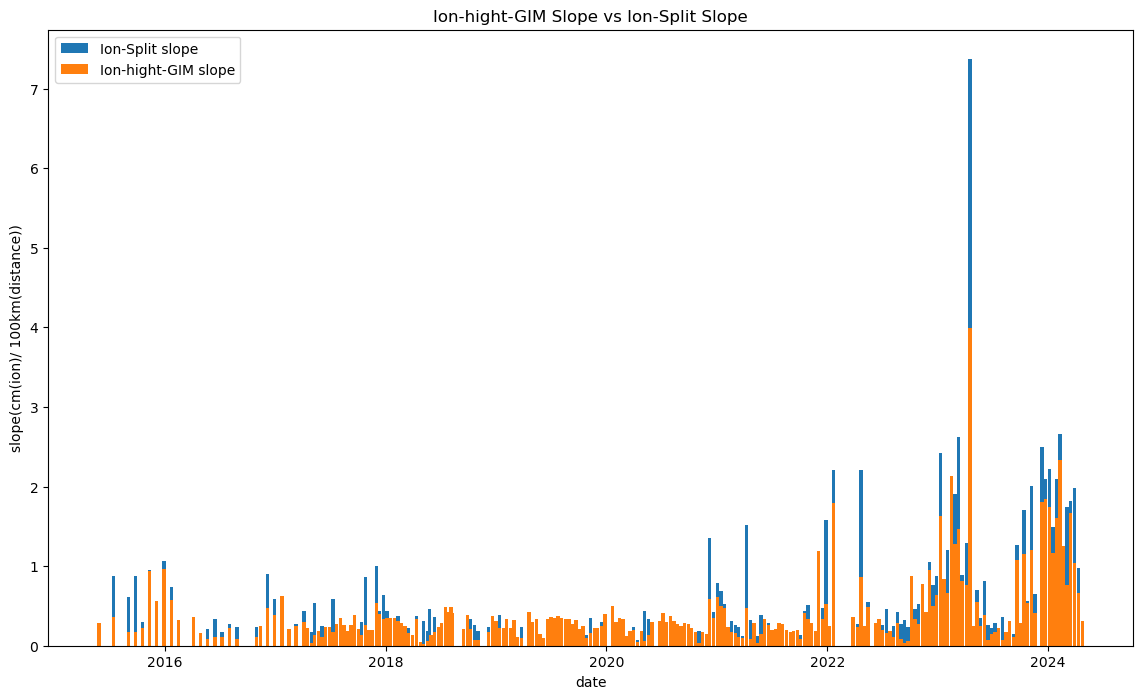

In [33]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split, width, label='Ion-Split slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM, width, label='Ion-hight-GIM slope', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-Split Slope')
ax.legend()

plt.show()

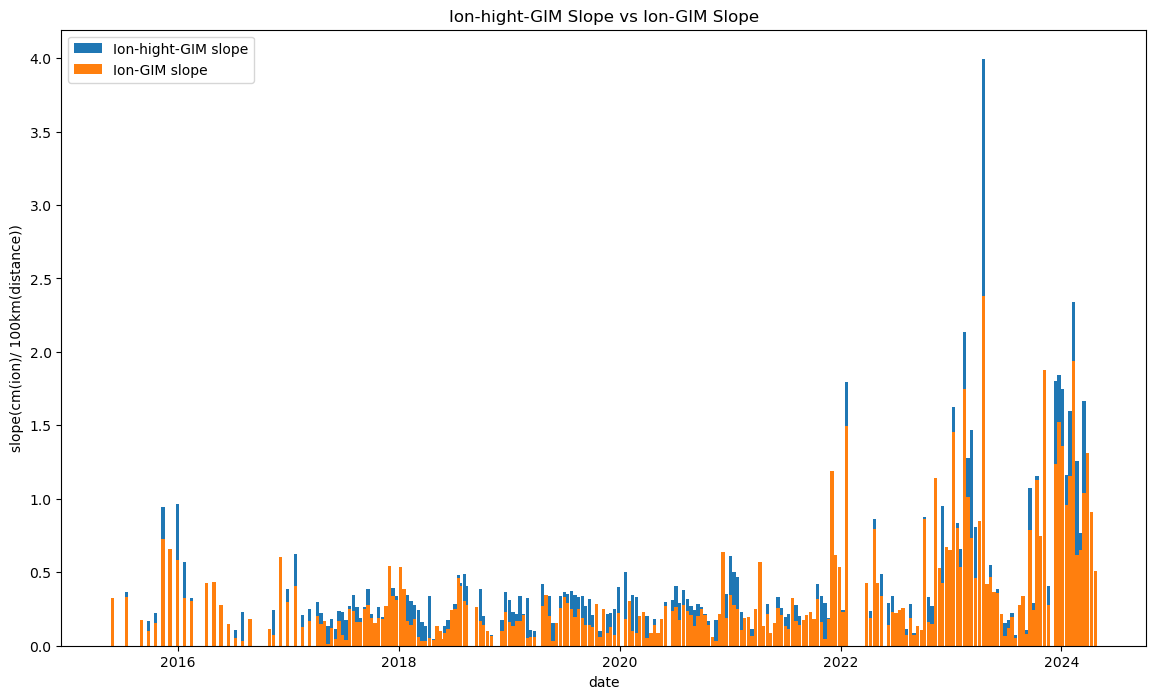

In [34]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]


ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM, width, label='Ion-hight-GIM slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM, width, label='Ion-GIM slope', alpha=1)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-GIM Slope')
ax.legend()

plt.show()

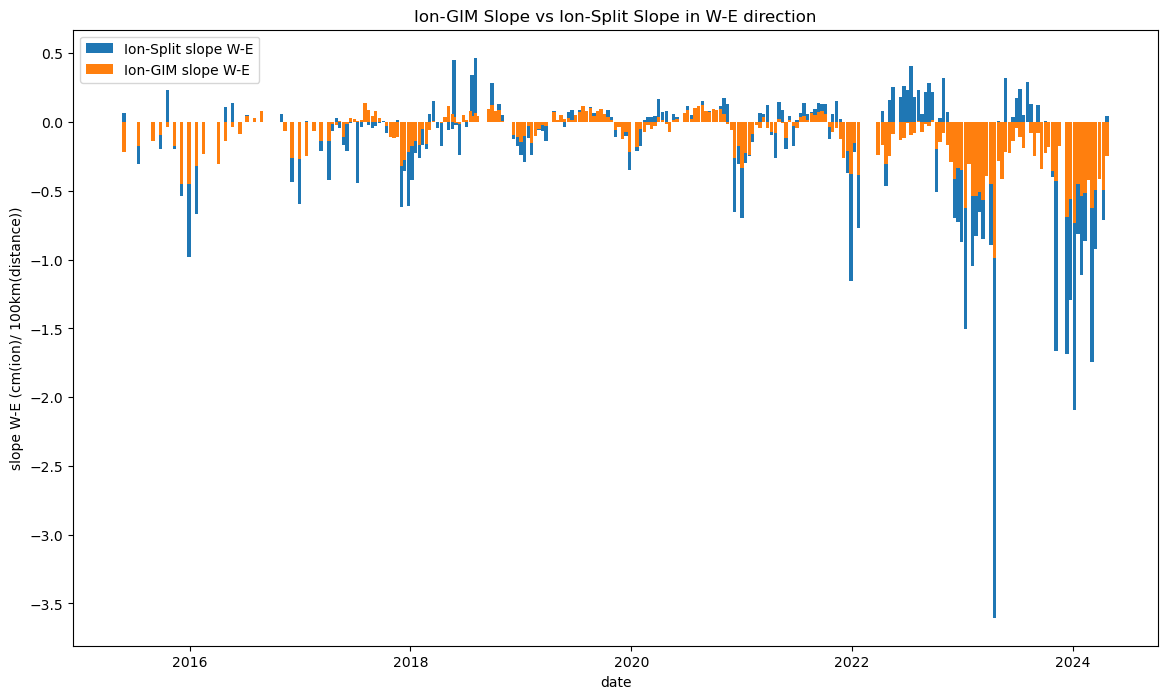

In [35]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_dongxifangxiang, width, label='Ion-Split slope W-E', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_dongxifangxiang, width, label='Ion-GIM slope W-E', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (cm(ion)/ 100km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in W-E direction')
ax.legend()

plt.show()

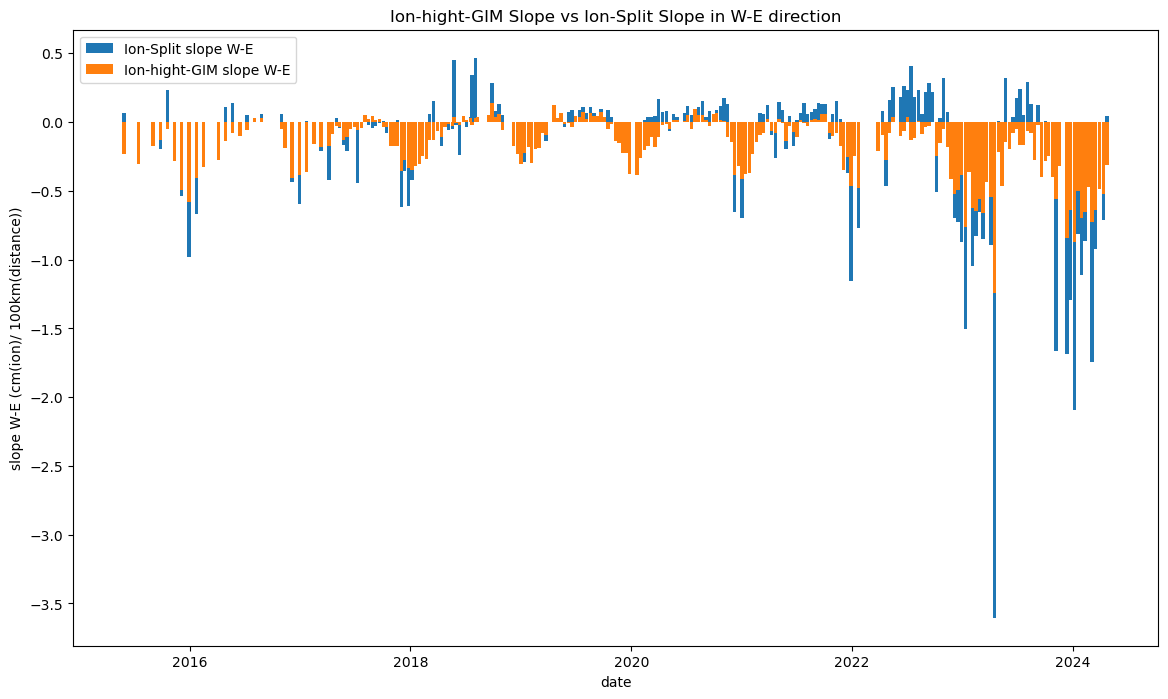

In [36]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_dongxifangxiang, width, label='Ion-Split slope W-E', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_dongxifangxiang, width, label='Ion-hight-GIM slope W-E', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-Split Slope in W-E direction')
ax.legend()

plt.show()

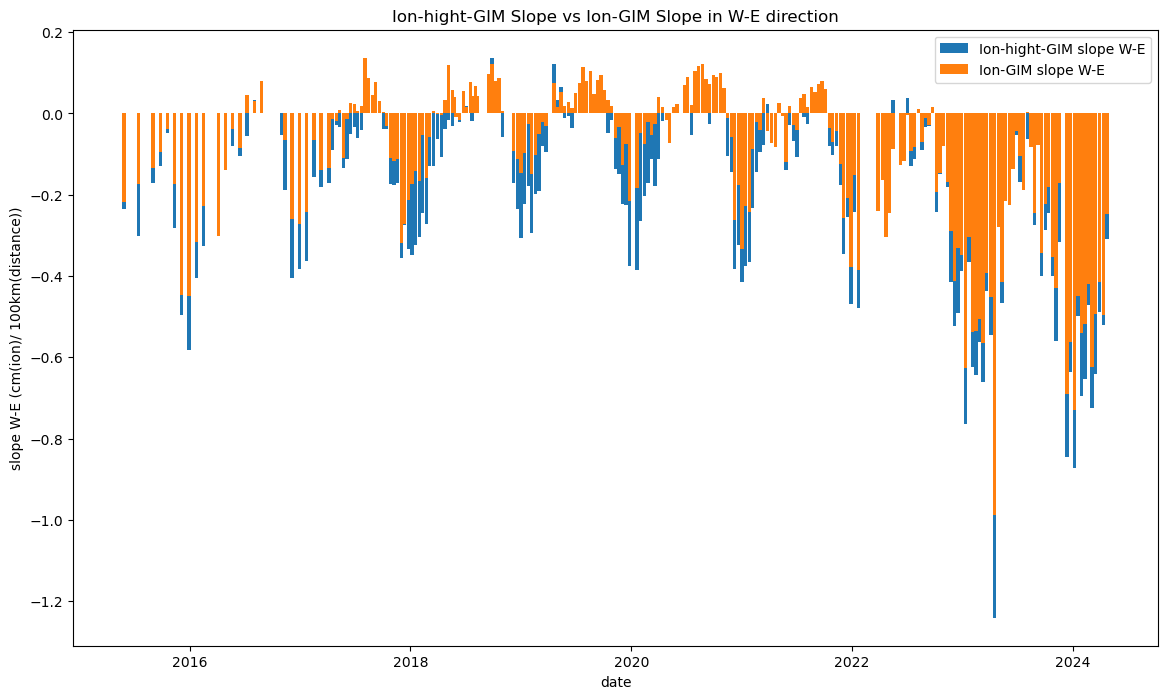

In [37]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_dongxifangxiang, width, label='Ion-hight-GIM slope W-E', alpha=1) 
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_dongxifangxiang, width, label='Ion-GIM slope W-E', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-GIM Slope in W-E direction')
ax.legend()

plt.show()

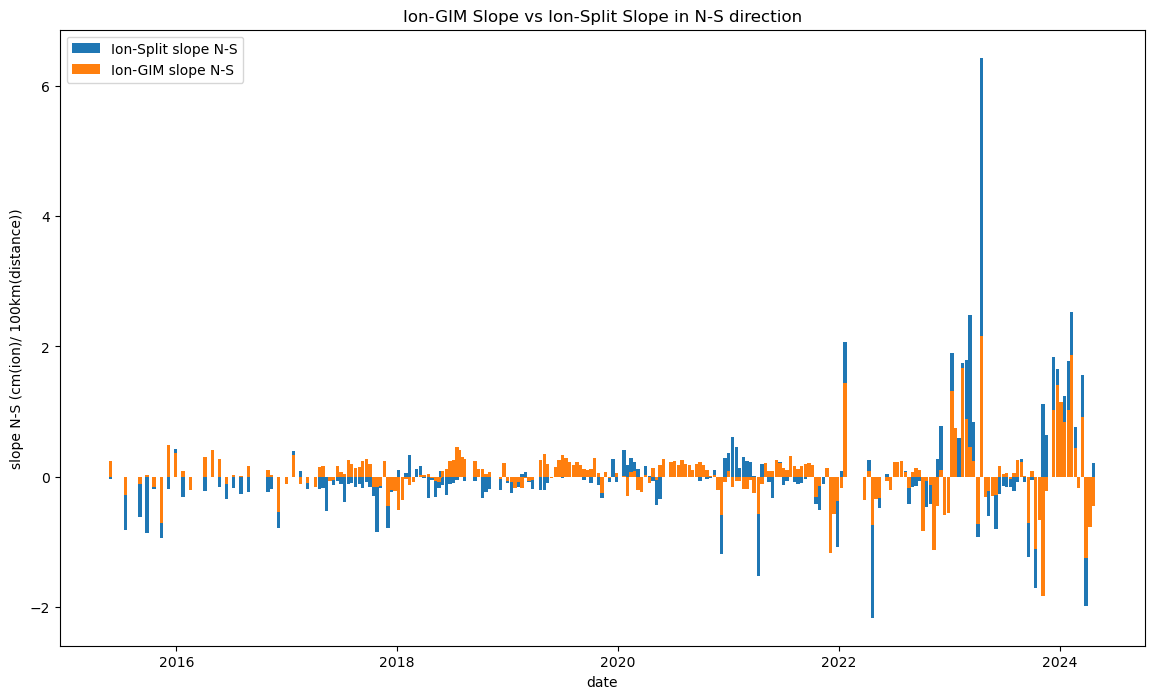

In [38]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_nanbeifangxiang, width, label='Ion-Split slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_nanbeifangxiang, width, label='Ion-GIM slope N-S', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (cm(ion)/ 100km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in N-S direction')

ax.legend()

plt.show()

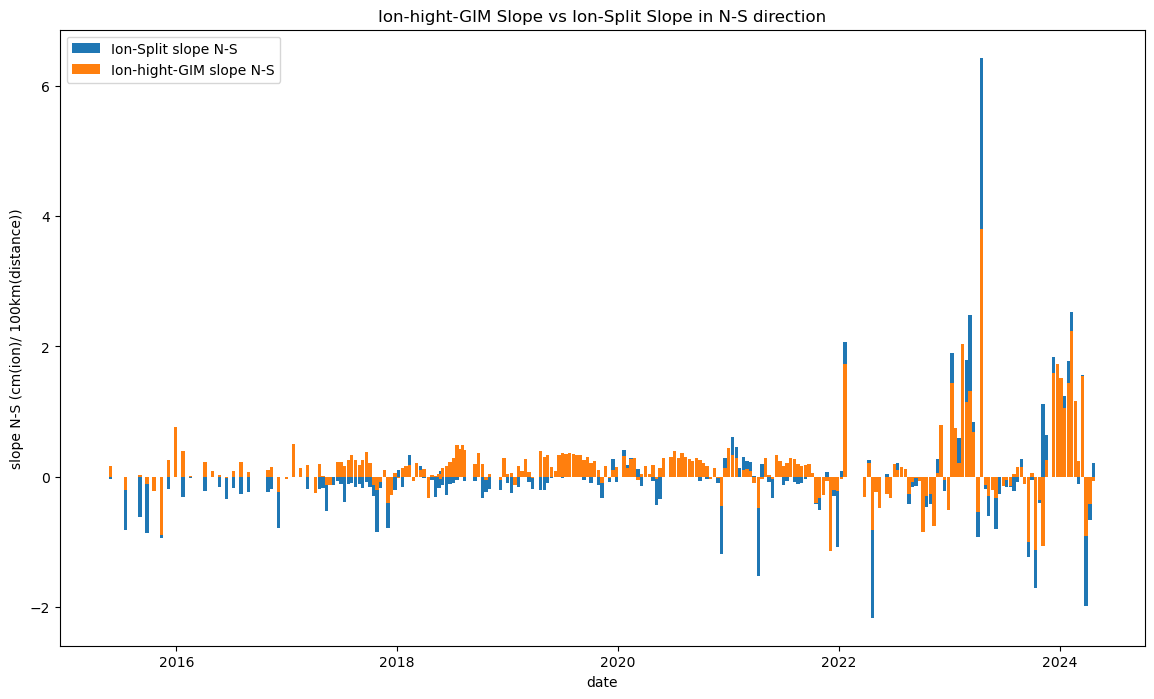

In [39]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_nanbeifangxiang, width, label='Ion-Split slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_nanbeifangxiang, width, label='Ion-hight-GIM slope N-S', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-Split Slope in N-S direction')

ax.legend()

plt.show()

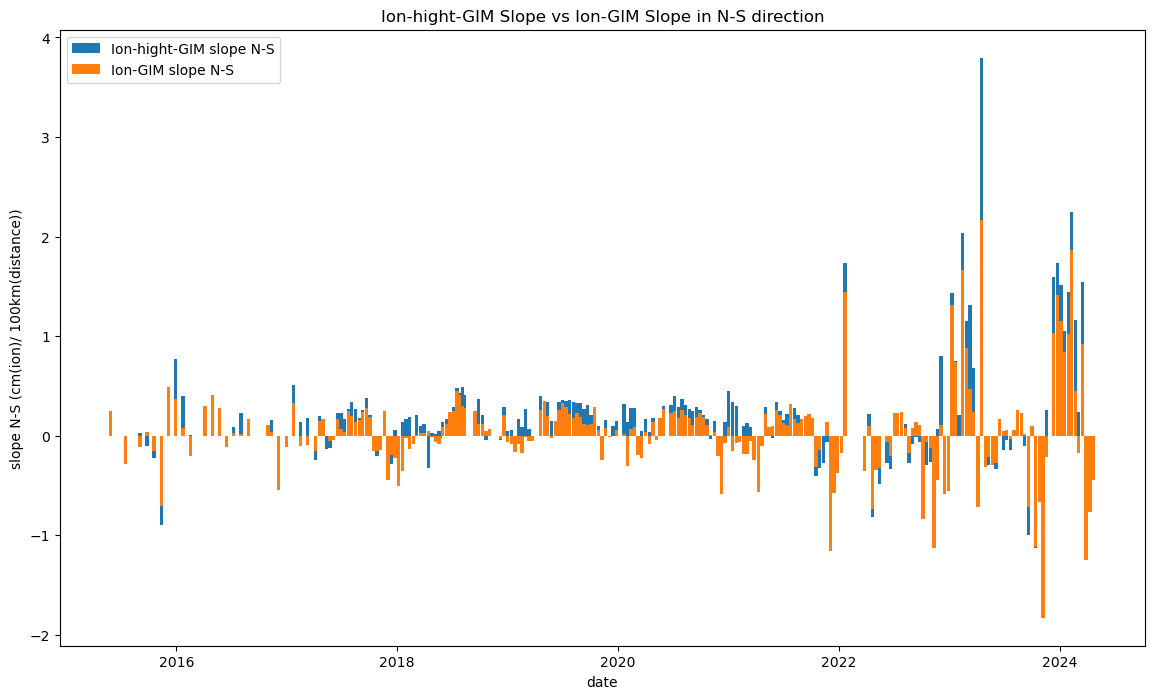

In [40]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_nanbeifangxiang, width, label='Ion-hight-GIM slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_nanbeifangxiang, width, label='Ion-GIM slope N-S', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-GIM Slope in N-S direction')

ax.legend()

plt.show()

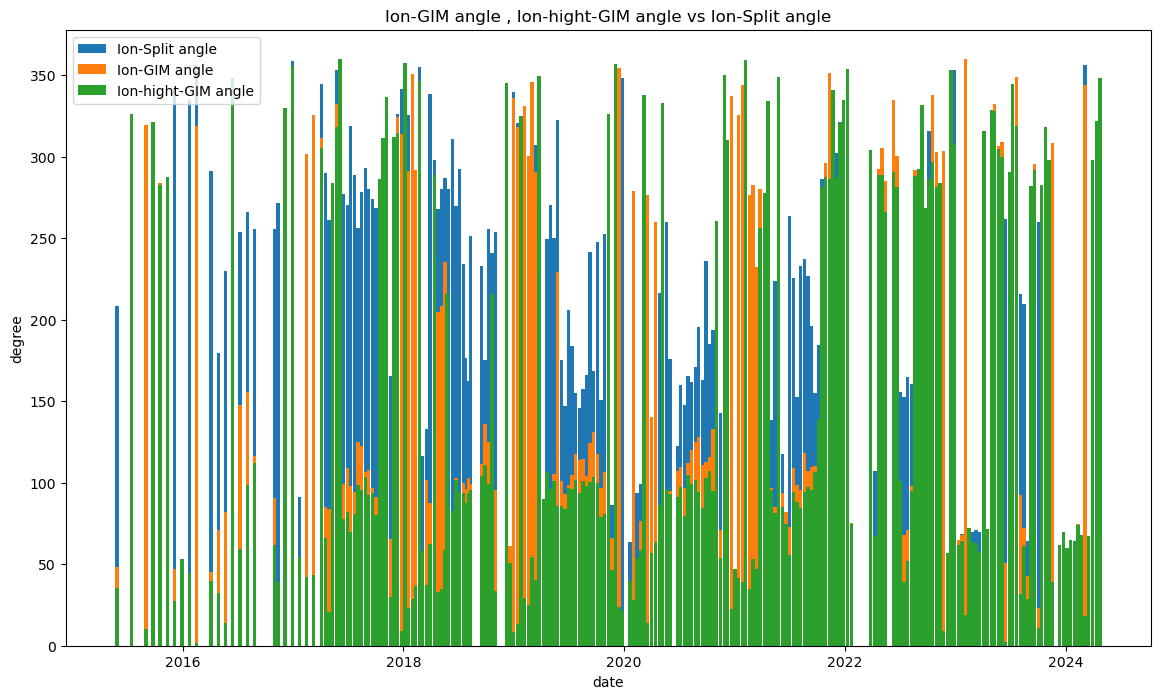

In [41]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, angle_deg_ion_split, width, label='Ion-Split angle', alpha=1)
ax.bar(date_GIM_numeric, angle_deg_ion_GIM, width, label='Ion-GIM angle', alpha=1) 
ax.bar(date_GIM_numeric, angle_deg_ion_hight_GIM, width, label='Ion-hight-GIM angle', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('degree')
ax.set_title('Ion-GIM angle , Ion-hight-GIM angle vs Ion-Split angle')
ax.legend()

plt.show()